<a href="https://colab.research.google.com/github/amnasyed1/datasci_5_statistics/blob/main/datasci_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chi-Square Test**


In [ ]:
import pandas as pd
import scipy
from scipy.stats import chi2_contingency as chi2

In [118]:
# The dataset contains data from a survey completed by individuals who work in the tech industry about their mental health
mhtech = pd.read_csv('https://raw.githubusercontent.com/amnasyed1/datasci_5_statistics/main/datasets/mental_health_in_tech_survey.csv')
mhtech

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Hypothesis

Hypothesis: There is a correlation between working remote and it interfering with one's work if they have a mental health condition.

- Null Hypothesis (H0): There is no relationship or correlation between working remote and a mental health condition interfering with their work.

- Alternative Hypothesis (H1): There is a relationship or correlation between working remote and a mental health condition interfering with their work.

In [4]:
mhtech.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
mhtech['remote_work'].value_counts()

No     883
Yes    376
Name: remote_work, dtype: int64

In [6]:
mhtech['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [7]:
contingency_table = pd.crosstab(mhtech['remote_work'], mhtech['work_interfere'])
print(contingency_table)

work_interfere  Never  Often  Rarely  Sometimes
remote_work                                    
No                157     93     119        322
Yes                56     51      54        143


In [8]:
chi2, p, _, _ = chi2(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 3.4731660005348104
P-value: 0.3242591134502088


## Results

Significance Level = 0.05

P-value: 0.3242591134502088

Due to the p-value being greater than the significance level, we can reject the H1 because there is not enough evidence to reject the H0. The test shows that there is not a strong correlation between working remotely and one's mental health condition interfering with their work.

## Rational
I obtained this dataset from Kaggle, I was intrigued to analyze the survey answers from tech industry employees. I also was interested to see what their experiences were with their mental health, and how it may or may not affect their work.
I chose to examine the "remote_work" and "work_interfere" columns due to the trend and increasing number of jobs/companies, especially in the tech industry, having the option for employees to work remotely or requiring their employees to work remotely. Working remotely may be isolating, and for individuals with mental health conditions it may interfere with their work.

# **T-Test**

In [30]:
import pandas as pd
from scipy.stats import ttest_ind

In [85]:
# The dataset contains data from patients with breast cancer who had surgery to remove their tumors.
brca = pd.read_csv('https://raw.githubusercontent.com/amnasyed1/datasci_5_statistics/main/datasets/BRCA.csv')
brca.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
6,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
8,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
9,TCGA-A8-A09A,40.0,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive


## Hypothesis

- Null Hypothesis (H0): There is no correlation between the expression levels of Protien4 and the Patient Status

- Alternative Hypothesis (H1): There is a correlation between the expression levels of Protien4 and the Patient Status


In [34]:
brca.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [37]:
dead_data = brca[brca['Patient_Status'] == 'Dead']['Protein4']
dead_data

1     -0.031505
4     -0.311990
11    -0.350700
18     0.601030
25     1.629900
         ...   
329   -0.517350
330   -0.354920
331    0.339680
332   -0.188480
333   -0.067848
Name: Protein4, Length: 66, dtype: float64

In [38]:
alive_data = brca[brca['Patient_Status'] == 'Alive']['Protein4']
alive_data

0      0.273680
2     -0.234260
3      0.124270
5      0.043025
6      0.391580
         ...   
322    1.044100
323    0.351920
324    0.261420
325    0.458740
326    0.721820
Name: Protein4, Length: 255, dtype: float64

In [40]:
# Assuming unequal variances with Welch's t-test # noqa
t_stat, p_val = ttest_ind(alive_data, dead_data)
t_stat, p_val = ttest_ind(alive_data, dead_data, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -1.4214132952738339
P-value: 0.1582830197703266


In [41]:
# Compute means for alive and dead data
alive_mean = alive_data.mean()
dead_mean = dead_data.mean()

print(f"Mean prevalence for southern states: {alive_mean}")
print(f"Mean prevalence for non-southern states: {dead_mean}")

Mean prevalence for southern states: -0.016361614666666666
Mean prevalence for non-southern states: 0.10607757575757576


## Results

Significance Level = 0.05
P-value: 0.1582830197703266


- Due to the p-value being greater than the significance level, we can reject the H1 because there is not enough evidence to reject the H0. The test shows that there is not a strong correlation  between the patient's status (alive or expired) and the expression levels of Protien4.

## Rational
I obtained this dataset from Kaggle, I was intrigued to analyze the data which was presented in the dataset pertaining to breast cancer.
I chose to examine "Protien4" and "Patient_Status" columns to analyze if Protein4 expression levels have any type of correlations to a breast cancer patient's death.


# **ANOVA**

In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd



In [86]:
# The dataset contains data from patients with breast cancer who had surgery to remove their tumors.
brca = pd.read_csv('https://raw.githubusercontent.com/amnasyed1/datasci_5_statistics/main/datasets/BRCA.csv')
brca.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
6,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
8,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
9,TCGA-A8-A09A,40.0,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive


## Hypothesis

- Null Hypothesis (H0): The expression levels of Protein1 will not differ depending on the tumor stage.

- Alternative Hypothesis (H1): The expression levels of Protein1 will differ depending on the tumor stage.

In [81]:
brca.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [82]:
model = ols('Protein1 ~ C(Tumour_Stage) * C(Surgery_type)', data=brca).fit()
model

In [83]:
# Performing the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                    sum_sq     df         F    PR(>F)
C(Tumour_Stage)                   0.309893    2.0  0.500490  0.606704
C(Surgery_type)                   3.121570    3.0  3.360982  0.019051
C(Tumour_Stage):C(Surgery_type)   2.518698    6.0  1.355936  0.231997
Residual                         99.687705  322.0       NaN       NaN


## Results
Significance Level = 0.05
P-Value = 0.606704

- Due to the p-value being greater than the significance level, we can reject the H1 because there is not enough evidence to reject the H0. The test shows that there is not a strong correlation between the expression levels of Protein1 and the tumor stage of the cancer patient.

## Rational
I obtained this dataset from Kaggle, I was intrigued to analyze the data which was presented in the dataset pertaining to breast cancer.
I chose to examine "Protien1" and "Tumor_Stage" columns to analyze if Protein1 expression levels have any type of correlations to the tumor stage of the breast cancer patient.

# **Regression**

In [113]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [114]:
# The dataset contains diabetes medical predictor variables. The patients in the dataset are women of Pima Native American heritage, who are 21 years old or older.
diabetes = pd.read_csv('https://raw.githubusercontent.com/amnasyed1/datasci_5_statistics/main/datasets/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Hypothesis

- Null Hypothesis (H0): A patient's glucose levels do not predict a patient's diastolic blood pressure level.

- Alternative Hypothesis (H1): A patient's glucose levels predict a patient's diastolic blood pressure level.

In [115]:
# With Scikit-learn

# Extracting data for regression
X = diabetes[['Glucose']]
y = diabetes['BloodPressure']

# Initialize and fit the model
model = LinearRegression().fit(X, y)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_

# Extract model parameters
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

# Display results
print(f"Slope (Coefficient for Glucose): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_squared:.2f}")

# If you want to display predictions for the first 5 individuals
predictions = model.predict(X)
print("\nPredicted Blood Pressure for the first 5 individuals:")
for i, prediction in enumerate(predictions[:5]):
    print(f"Individual {i + 1}: {prediction:.2f}")

Slope (Coefficient for Glucose): 0.09
Intercept: 57.94
R-squared value: 0.02

Predicted Blood Pressure for the first 5 individuals:
Individual 1: 71.61
Individual 2: 65.79
Individual 3: 74.84
Individual 4: 66.16
Individual 5: 70.59


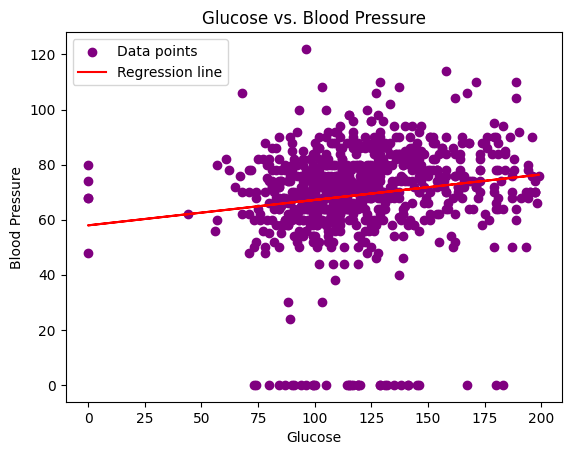

In [116]:
plt.scatter(X, y, color='purple', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.title('Glucose vs. Blood Pressure')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

In [117]:
# With Statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Extracting data for regression
X = diabetes[['Glucose']]
X = sm.add_constant(X)  # Add an intercept to our model
y = diabetes['BloodPressure']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract model parameters
slope = model.params['Glucose']
intercept = model.params['const']
r_squared = model.rsquared

# Display results
print(f"Slope (Coefficient for Glucose): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_squared:.2f}")

# For a detailed summary:
print(model.summary())

# If you want to display predictions for the first 5 individuals
predictions = model.predict(X)
print("\nPredicted Blood Pressure for the first 5 individuals:")
for i, prediction in enumerate(predictions[:5]):
    print(f"Individual {i + 1}: {prediction:.2f}")

Slope (Coefficient for Glucose): 0.09
Intercept: 57.94
R-squared value: 0.02
                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     18.26
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           2.17e-05
Time:                        03:21:50   Log-Likelihood:                -3355.8
No. Observations:                 768   AIC:                             6716.
Df Residuals:                     766   BIC:                             6725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

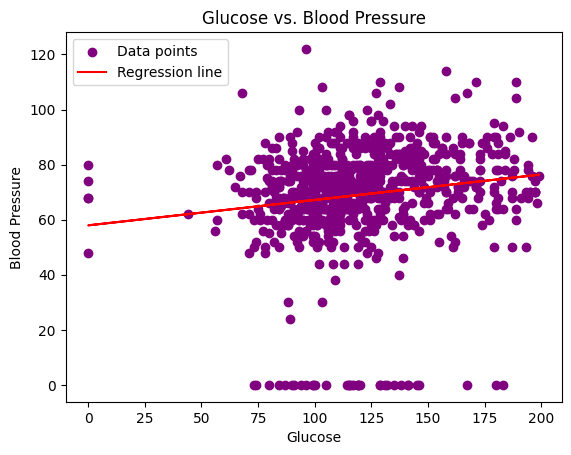

In [107]:
plt.scatter(X['Glucose'], y, color='purple', label='Data points')
plt.plot(X['Glucose'], predictions, color='red', label='Regression line')
plt.title('Glucose vs. Blood Pressure')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

## Results

As the visulizations show above, there is a linear relationship between Glucose and Blood Pressure. If glucose levels are high, then one's diastolic blood pressue will also most likely increase. Therefore, glucose levels can predict what one's diastolic blood pressure is.

## Rational
I obtained this dataset from Kaggle. I thought it would be interesting to analyze how different variables all affect or not affect one another, especially in diabetic women.
I chose to examine the "Glucose" and "Blood Pressure" columns to examine if glucose levels can predict diastolic blood pressure and vice versa.

# **Insights**

A pattern I observed was that the results of the Chi-Square, T-Test, and ANOVA all relayed p-values that were greater than the significance level of 0.05.